In [1]:
import numpy as np
import pandas as pd 
df_ads = pd.read_csv('D:\\document\\UIUC PhD\\fall2022\\CEE422\\research\\bid_float.csv')
df_ads.head()

,Dist,PID,Spec Year,Qty,Proposal Line #,Min Bid,Max Bid,Average Bid,Award Bid,Num of Bidders,Project #
0,11,101853,16,4.81,20,25.00,900.0,309.33333,900.00,6,190300
1,11,106688,19,7.17,19,1.00,160.0,78.63333,74.90,3,200031
2,2,107464,19,4.84,22,0.01,5.0,2.50500,5.00,2,200179
3,10,106643,19,0.64,20,70.00,1563.0,385.56600,149.83,5,200272
4,8,105831,19,0.60,34,100.00,110.0,102.50000,100.00,4,210237


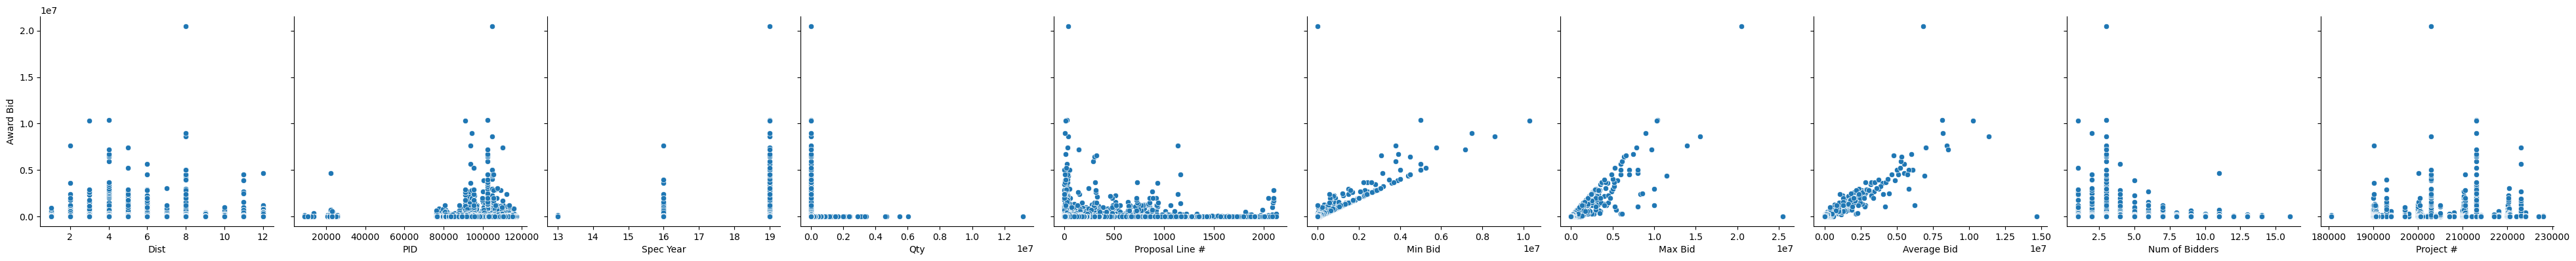

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.pairplot(df_ads, x_vars=['Dist', 'PID', 'Spec Year','Qty','Proposal Line #','Min Bid','Max Bid','Average Bid','Num of Bidders','Project #'], 
                          y_vars='Award Bid', 
                          height=4, aspect=1, kind='scatter')
plt.show()

In [3]:
X = np.array(df_ads['Average Bid'])
y = np.array(df_ads['Award Bid']) 
print ("nidm:",X.ndim)
print ("shape:", X.shape)

nidm: 1
shape: (177294,)


In [4]:
X = X.reshape(-1,1) 
y = y.reshape(-1,1) 
print ("ndim:",X.ndim)
print ("shape:", X.shape)

ndim: 2
shape: (177294, 1)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=0)

In [6]:
def scaler(train, test): 
    min = train.min(axis=0) 
    max = train.max(axis=0) 
    gap = max - min 
    train -= min 
    train /= gap 
    test -= min 
    test /= gap 
    return train, test

In [7]:
X_train,X_test = scaler(X_train,X_test) 
y_train,y_test = scaler(y_train,y_test) 

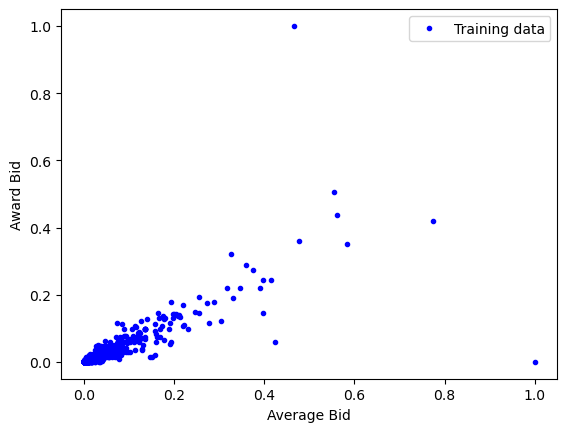

In [27]:
plt.plot(X_train,y_train,'b.', label='Training data') 
plt.xlabel('Average Bid') 
plt.ylabel('Award Bid') 
plt.legend() 
plt.show() 

In [9]:
def predict(weight,bias,X): 
    y_hat = weight*X + bias 
    return y_hat 

In [10]:
def cost_function(X, y, w, b):        
    y_hat = w*X + b 
    loss = y_hat-y 
    cost = np.sum(loss**2)/len(X)
    return cost 

In [11]:
print ( cost_function(X_train, y_train, w=5, b=3))
print (cost_function(X_train, y_train, w=100, b=1))

当权重5，偏置3时，损失为： 9.015286190436772
当权重100，偏置1时，损失为： 1.6427505282131616


In [12]:
def gradient_descent(X, y, w, b, lr, iter):
    l_history = np.zeros(iterations) # 
    w_history = np.zeros(iterations) # 
    b_history = np.zeros(iterations) #                       
    for iter in range(iterations): # ，
        y_hat  = w*X + b # 
        loss = y_hat-y # 
        derivative_weight = X.T.dot(loss)/len(X)*2 # ，len(X)
        derivative_bias = sum(loss)*1/len(X)*2 # ，len(X)
        w = w - lr*derivative_weight # 
        b = b - lr*derivative_bias # 
        l_history[iter] = cost_function(X, y, w,b) #  
        w_history[iter] = w # 
        b_history[iter] = b # 
    return l_history, w_history, b_history #    

In [13]:
def linear_regression(X, y, weight, bias, alpha, iterations): 
    loss_history, weight_history, bias_history = gradient_descent(X, y, 
                                                                  weight, bias, 
                                                                  alpha, iterations)
    print( loss_history[-1]) # 
    y_pred = predict(weight_history[-1],bias_history[-1],X) # 
    traning_acc = 100 - np.mean(np.abs(y_pred - y))*100 # 
    print("RATE: {:.2f}%".format(traning_acc))  # 
    return loss_history, weight_history, bias_history # 

In [14]:
# 
iterations = 200000; # 
alpha = 0.5; 
weight = -5 # 
bias = 3 # 
# 
print ('当前损失：',cost_function(X_train, y_train, weight, bias))

当前损失： 8.983498074752777


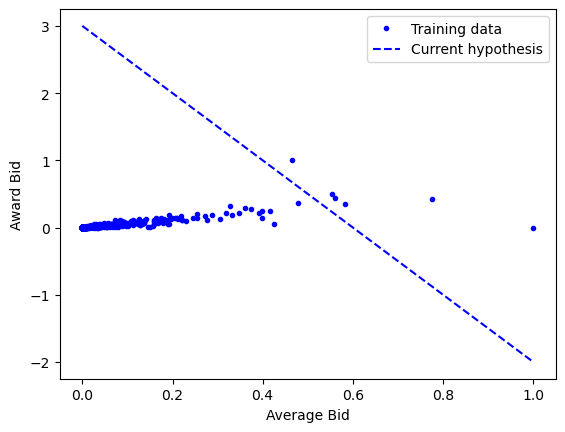

In [28]:

plt.plot(X_train, y_train,'b.', label='Training data') 
line_X = np.linspace(X_train.min(), X_train.max(), 200000) 
line_y = [weight*xx + bias for xx in line_X]
plt.plot(line_X,line_y,'b--', label='Current hypothesis' ) 
plt.xlabel('Average Bid') 
plt.ylabel('Award Bid') 
plt.legend() 
plt.show() 

In [16]:
loss_history, weight_history, bias_history = \
   linear_regression(X_train,y_train,weight,bias,alpha,iterations)

训练最终损失: 7.935679625377014e-06
线性回归训练准确率: 99.99%


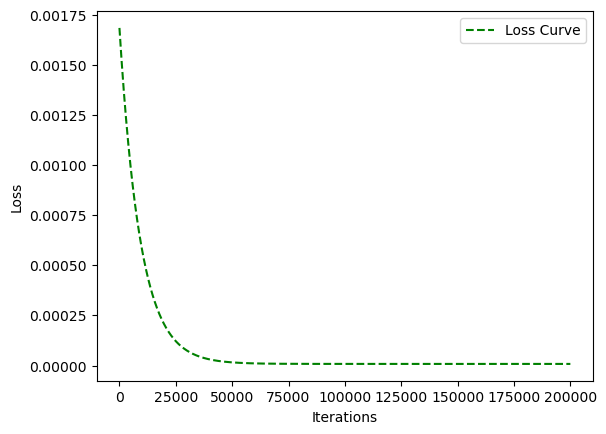

In [17]:
plt.plot(loss_history,'g--',label='Loss Curve')
plt.xlabel('Iterations') 
plt.ylabel('Loss') #
plt.legend() 
plt.show() 

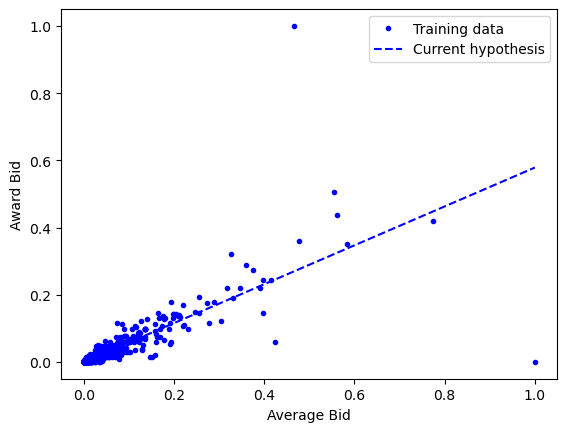

In [26]:
plt.plot(X_train, y_train,'b.', label='Training data') # 
line_X = np.linspace(X_train.min(), X_train.max(),200000) # 
# 关于weight_history[-1],
line_y = [weight_history[-1]*xx + bias_history[-1] for xx in line_X] 
plt.plot(line_X,line_y,'b--', label='Current hypothesis' ) 
plt.xlabel('Average Bid')
plt.ylabel('Award Bid')
plt.legend()
plt.show() 

In [19]:
print (cost_function(X_train, y_train, weight_history[-1], bias_history[-1]))
print (weight_history[-1])
print (bias_history[-1])

当前损失： 7.935679625377014e-06
当前权重： 0.5784505417167578
当前偏置： 1.8818522262760885e-05


In [20]:
print (cost_function(X_test, y_test, weight_history[-1], bias_history[-1]))

测试集损失： 1.988251309190076e-06


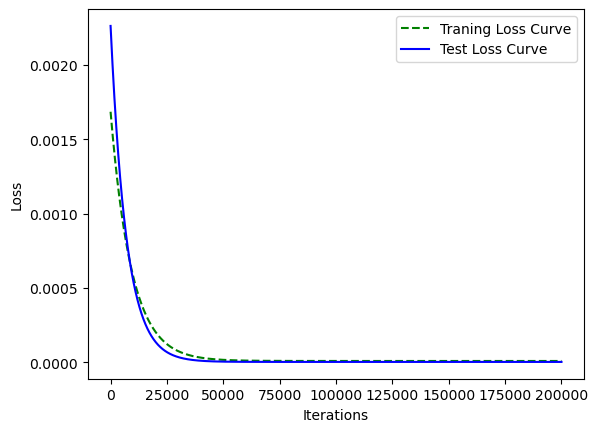

In [25]:
loss_test ,a , b = gradient_descent(X_test, y_test, weight, bias, alpha, iterations)
plt.plot(loss_history,'g--',label='Traning Loss Curve')
plt.plot(loss_test,'b',label='Test Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss') 
plt.legend() 
plt.show()